# Projeto - Redução de dimensionalidade em imagens para rede neurais
## Importando bibliotecas necessárias

Neste passo, importamos as bibliotecas essenciais para realizar as tarefas de download, processamento, exibição e manipulação de imagens. Essas bibliotecas são fundamentais para a leitura de imagens, conversão para escala de cinza e binarização, além de ajudar na visualização dos resultados.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from PIL import Image
from io import BytesIO

## Função de download

Neste projeto, utilizamos uma imagem da web como entrada. A função abaixo recebe uma URL da imagem, baixa a imagem e a salva localmente para ser utilizada no notebook. Este passo é útil quando as imagens precisam ser obtidas de fontes online. Em um cenário de processamento em larga escala com imagens locais, este passo se torna desnecessário.

In [2]:
def download_image_from_url(img_url):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    img.save('convert_image.jpg')
    return 'convert_image.jpg'

## Convertendo a imagem de entrada

Esta função recebe o caminho da imagem (local ou baixada) e a converte para uma versão binarizada. O processo de binarização é útil para reduzir a complexidade da imagem e facilitar o processamento em redes neurais. Durante este processo, as imagens passam por três etapas: a imagem colorida, a imagem em escala de cinza e a imagem binarizada. Essas etapas serão exibidas para fins didáticos, permitindo uma visualização clara do impacto de cada transformação. O código salva a imagem binarizada com um nome genérico, o que pode ser alterado conforme a necessidade em aplicações de larga escala.

In [3]:
def convert_img_to_binarized(img):

    image = cv2.imread(img)
    color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binarized_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    plt.subplot(1, 3, 1)
    plt.imshow(color_image)
    plt.title('Imagem Colorida')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Imagem Binarizada')
    plt.axis('off')


    plt.subplot(1, 3, 3)
    plt.imshow(binarized_image, cmap='gray')
    plt.title('Imagem Binarizada')
    plt.axis('off')

    plt.show()

    # Saida Generica, salvando o arquivo como binarized_image.jpg
    output_path = 'binarized_image.jpg'
    cv2.imwrite(output_path, binarized_image)

    return binarized_image



## Indicando a URL da imagem

Nesta etapa, o usuário precisa fornecer a URL de uma imagem para ser processada. Esse processo é necessário apenas quando se deseja utilizar imagens diretamente da web. Em um ambiente de processamento em larga escala, onde as imagens estão armazenadas localmente, esse passo se torna desnecessário, e as imagens podem ser lidas diretamente do sistema de arquivos.

Para que a conversão funcione, insira uma URL que aponte para um arquivo JPG, JPEG ou PNG.
Insira a URL da imagem:https://cdn.pixabay.com/photo/2022/05/09/07/52/flamingo-7183937_1280.jpg




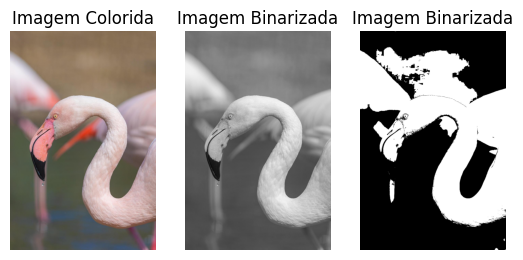

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [4]:
print(f'Para que a conversão funcione, insira uma URL que aponte para um arquivo JPG, JPEG ou PNG.')
test_img = download_image_from_url(input(f'Insira a URL da imagem:'))
print(f'\n')
convert_img_to_binarized(test_img)
